# **Telco Customer Churn**

https://www.kaggle.com/blastchar/telco-customer-churn

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependent

In [ ]:
import pandas as pd
from google.colab import drive



drive.mount('/content/drive',force_remount=True)
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/TelcoCustomerChurn.csv')


Mounted at /content/drive


# 1. Libraries

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,VotingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier,Lasso,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler




# 2. Data Modeling

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['tenure'] =pd.to_numeric(df['tenure'], errors='coerce')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['Churn'] = df['Churn'].replace({'Yes':1,'No':0})

#print('Tenure dtype:', df['tenure'].dtype)
#print('TotalCharges dtype:', df['TotalCharges'].dtype)

In [ ]:
features = list(df.columns)[1:]
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Rename data

In [ ]:
for feature in features[1:]:
  print('\n')
  print(feature)
  print(df[feature].unique())



SeniorCitizen
[0 1]


Partner
['Yes' 'No']


Dependents
['No' 'Yes']


tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService
['No' 'Yes']


MultipleLines
['No phone service' 'No' 'Yes']


InternetService
['DSL' 'Fiber optic' 'No']


OnlineSecurity
['No' 'Yes' 'No internet service']


OnlineBackup
['Yes' 'No' 'No internet service']


DeviceProtection
['No' 'Yes' 'No internet service']


TechSupport
['No' 'Yes' 'No internet service']


StreamingTV
['No' 'Yes' 'No internet service']


StreamingMovies
['No' 'Yes' 'No internet service']


Contract
['Month-to-month' 'One year' 'Two year']


PaperlessBilling
['Yes' 'No']


PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]


TotalCharges
[  

In [ ]:
to_binary = ['Partner','Dependents','PhoneService','PaperlessBilling']

In [ ]:
for binary in to_binary:
  df[binary] = df[binary].replace({'Yes':1,'No':0}).astype('category')

In [ ]:
for binary in to_binary:
  print('\n')
  print(binary)
  print(df[binary].value_counts())



Partner
0    3641
1    3402
Name: Partner, dtype: int64


Dependents
0    4933
1    2110
Name: Dependents, dtype: int64


PhoneService
1    6361
0     682
Name: PhoneService, dtype: int64


PaperlessBilling
1    4171
0    2872
Name: PaperlessBilling, dtype: int64


In [ ]:
df1 = df.copy()

In [ ]:
to_cat = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [ ]:
for cat in to_cat:
  df1[cat] = df1[cat].replace({'Yes':1,'No':0,'No internet service': -1}).astype('category')

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df1['gender'] = df1['gender'].replace({'Male':0,'Female':1}).astype('category')

In [ ]:
df1['MultipleLines'] = df1['MultipleLines'].replace({'Yes':1,'No':0,'No phone service':-1}).astype('category')

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,-1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,-1,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [ ]:
df1['InternetService'] = df1['InternetService'].replace({'DSL':'D', 'Fiber optic':'FO', 'No':'NA'}).astype('category')
df1['Contract'] = df1['Contract'].replace({'Month-to-month':'MM', 'One year':'1Y','Two year':'2Y'}).astype('category')
df1['PaymentMethod'] = df1['PaymentMethod'].replace({'Electronic check':'EC', 'Mailed check':'MC', 'Bank transfer (automatic)':'BA','Credit card (automatic)':'CA'}).astype('category')

In [ ]:
df1['SeniorCitizen']=df1['SeniorCitizen'].astype("category")

In [ ]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,-1,D,0,...,0,0,0,0,MM,1,EC,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,D,1,...,1,0,0,0,1Y,0,MC,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,D,1,...,0,0,0,0,MM,1,MC,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,-1,D,1,...,1,1,0,0,1Y,0,BA,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,FO,0,...,0,0,0,0,MM,1,EC,70.70,151.65,1


# 3. Data analysis

**As analyzed below, churns will be high if:**
1. If it is "SeniorCitizen";
2. If you don't have "Partner";
3. If you don't have "Dependents";
4. Lower the "tenure"
5. If "InternetService" is "Fiber optic";
6. If you don't have "OnlineSecurity";
7. If you don't have "OnlineBackup";
8. If you don't have "DeviceProtection";
9. If you don't have "TechSupport";
10. "Contract" for "Month to Month";
11. If it is "PaperlessBilling";
12. If "PaymentMethod" is "ElectronicCheck"

In [ ]:
for feature in features[0:17]:
  print(df[[feature,'Churn']].groupby([feature]).mean())
  print('\n')

           Churn
gender          
Female  0.269209
Male    0.261603


                  Churn
SeniorCitizen          
0              0.236062
1              0.416813


            Churn
Partner          
0        0.329580
1        0.196649


               Churn
Dependents          
0           0.312791
1           0.154502


           Churn
tenure          
0       0.000000
1       0.619902
2       0.516807
3       0.470000
4       0.471591
...          ...
68      0.090000
69      0.084211
70      0.092437
71      0.035294
72      0.016575

[73 rows x 1 columns]


                 Churn
PhoneService          
0             0.249267
1             0.267096


                     Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099


                    Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050


                        Churn
OnlineSecurity               
No 

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [ ]:
sns.set_theme(style="whitegrid")

As analyzed below, the lower the "tenure", the greater the chance of "churn"

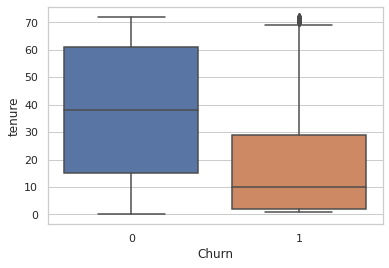

In [ ]:

sns.boxplot(y = 'tenure',x='Churn', data = df1)
plt.show()

#plt.tight_layout()

- The tendency to churn is higher among those with lower "TotalCharges". Pay attention to the large amount of "outliers" in those that left ("churn")

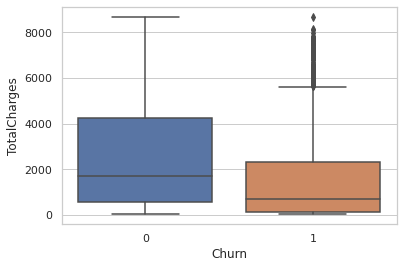

In [ ]:
sns.boxplot(y = 'TotalCharges',x='Churn' , data = df1)
plt.show()

There are 11 'NaN' in the "TotalCharges" attribute, which only occurs at Churn=0. They will be filled with the average of the "TotalCharges" values for Churn=0

In [ ]:
df1['TotalCharges'].isna().sum()

11

In [ ]:
df1[df1['TotalCharges'].isna()==1][['TotalCharges','Churn']]

,TotalCharges,Churn
488,NaN,0
753,NaN,0
936,NaN,0
1082,NaN,0
1340,NaN,0
3331,NaN,0
3826,NaN,0
4380,NaN,0
5218,NaN,0
6670,NaN,0


In [ ]:
tc_0 = df1[df['Churn']==0]['TotalCharges'].mean()
tc_0

2555.3441410032997

In [ ]:
df1['TotalCharges'] = df1['TotalCharges'].fillna(tc_0)

- The higher the 'MonthlyCharges', the greater the chance of Churn

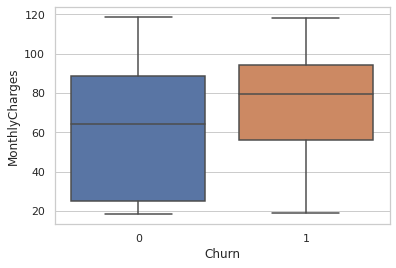

In [ ]:
sns.boxplot(y = 'MonthlyCharges',x='Churn', data = df1)
plt.show()

- Data is unbalanced: low churn (26.53% of total)

In [ ]:
df1['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
df1['Churn'].value_counts(normalize=True)

0    0.73463
1    0.26537
Name: Churn, dtype: float64

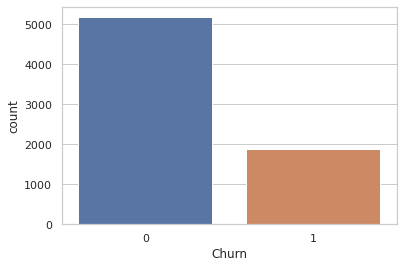

In [ ]:
sns.countplot(x='Churn',data=df1)

In [ ]:
churn_1 = df1[df1.Churn == 1]
churn_0 = df1[df1.Churn == 0]

In [ ]:
churn_1.shape

(1869, 21)

In [ ]:
churn_0.shape

(5174, 21)

In [ ]:
from sklearn.utils import resample
churn1_upsampled = resample(churn_1,
                          replace=True,
                          n_samples=5174,
                          random_state=150)

In [ ]:
dados_balance = pd.concat([churn_0, churn1_upsampled])

In [ ]:
df_x = pd.get_dummies(dados_balance,columns=['Contract','PaymentMethod','InternetService'])
df_x

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Contract_1Y,Contract_2Y,Contract_MM,PaymentMethod_BA,PaymentMethod_CA,PaymentMethod_EC,PaymentMethod_MC,InternetService_D,InternetService_FO,InternetService_NA
0,7590-VHVEG,1,0,1,0,1,0,-1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,0,0,0,0,45,0,-1,1,0,...,1,0,0,1,0,0,0,1,0,0
6,1452-KIOVK,0,0,0,1,22,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
7,6713-OKOMC,1,0,0,0,10,0,-1,1,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,4255-DDUOU,1,0,1,1,1,1,0,-1,-1,...,0,0,1,0,0,0,1,0,0,1
3849,5089-IFSDP,1,0,1,0,58,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
5779,2237-ZFSMY,1,0,0,0,39,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
6926,1450-SKCVI,1,0,0,0,56,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10348 entries, 0 to 4619
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   customerID          10348 non-null  object  
 1   gender              10348 non-null  category
 2   SeniorCitizen       10348 non-null  category
 3   Partner             10348 non-null  category
 4   Dependents          10348 non-null  category
 5   tenure              10348 non-null  int64   
 6   PhoneService        10348 non-null  category
 7   MultipleLines       10348 non-null  category
 8   OnlineSecurity      10348 non-null  category
 9   OnlineBackup        10348 non-null  category
 10  DeviceProtection    10348 non-null  category
 11  TechSupport         10348 non-null  category
 12  StreamingTV         10348 non-null  category
 13  StreamingMovies     10348 non-null  category
 14  PaperlessBilling    10348 non-null  category
 15  MonthlyCharges      10348 non-null  f

In [ ]:
df_x.isna().sum()

customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
PaperlessBilling      0
MonthlyCharges        0
TotalCharges          0
Churn                 0
Contract_1Y           0
Contract_2Y           0
Contract_MM           0
PaymentMethod_BA      0
PaymentMethod_CA      0
PaymentMethod_EC      0
PaymentMethod_MC      0
InternetService_D     0
InternetService_FO    0
InternetService_NA    0
dtype: int64

In [ ]:
y = df_x['Churn']

In [ ]:
df_x = df_x.drop('Churn', axis=1)

In [ ]:
features = list(df_x.columns)[1:]
features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Contract_1Y',
 'Contract_2Y',
 'Contract_MM',
 'PaymentMethod_BA',
 'PaymentMethod_CA',
 'PaymentMethod_EC',
 'PaymentMethod_MC',
 'InternetService_D',
 'InternetService_FO',
 'InternetService_NA']

# 4. Machine Learning
The following estimators were tested, among which RandomForestClassifier had the best result.
- RandomForestClassifier
- DecisionTreeClassifier
- AdaBoostClassifier
- ExtraTreesClassifier
- SGDClassifier
- LogisticRegression
- RidgeClassifier
- Kneighbor
- SVC

4.1. RandomForestClassifier

In [ ]:
X = df_x[features]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [ ]:
rf = RandomForestClassifier(random_state=0)#, class_weight="balanced")

param_dist = {"n_estimators": [1300,1500,1600],
              'max_depth': [None,1,2],
              "min_samples_leaf": [2,3],
              "min_samples_split": [2,3], #0.5
              "criterion": ["gini"]}

#rf_rs = RandomizedSearchCV(rf_cls, param_distributions=param_dist, cv=5, n_iter =25,verbose=True,random_state=0,scoring='recall', n_jobs=-1).fit(X_train,y_train)
rf_gs = GridSearchCV(estimator=rf,param_grid=param_dist,scoring='roc_auc', verbose=True, n_jobs=-1).fit(X_train,y_train)



print('Best params achieve a train score of', abs(rf_gs.best_score_),'with the params:')
rf_gs.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best params achieve a train score of 0.9308064852605102 with the params:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1500}

In [ ]:
rf_cls = RandomForestClassifier(random_state=0,
                                max_depth=None,
                                min_samples_leaf=2,
                                min_samples_split=2,
                                n_estimators=1500).fit(X_train,y_train)

rf_cross = cross_val_score(rf_cls, X_train,y_train, cv=5, scoring='roc_auc')


y_pred_rf = rf_cls.predict(X_test)
 


print("AUC: {}".format(roc_auc_score(y_test, y_pred_rf)))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))  
print('Cross validation Scores:\n', (rf_cross))
print('Cross validation Scores Mean:\n', (rf_cross.mean()))

AUC: 0.8615446712072378
[[ 997  268]
 [  86 1236]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1265
           1       0.82      0.93      0.87      1322

    accuracy                           0.86      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.86      0.86      2587

Cross validation Scores:
 [0.93624714 0.92988508 0.93293171 0.92137211 0.93359639]
Cross validation Scores Mean:
 0.9308064852605102


In [ ]:
features_importances = pd.DataFrame({'features': features,'importances':rf_cls.feature_importances_}).sort_values(by='importances',ascending = False)
print(display(features_importances[:26]))

features1 = list(features_importances[features_importances['importances']>0.004].features)
len(features1)

,features,importances
15,TotalCharges,0.155492
4,tenure,0.149180
14,MonthlyCharges,0.129650
18,Contract_MM,0.114595
17,Contract_2Y,0.052951
24,InternetService_FO,0.041977
21,PaymentMethod_EC,0.031957
7,OnlineSecurity,0.030023
10,TechSupport,0.026129
8,OnlineBackup,0.024404


None


26

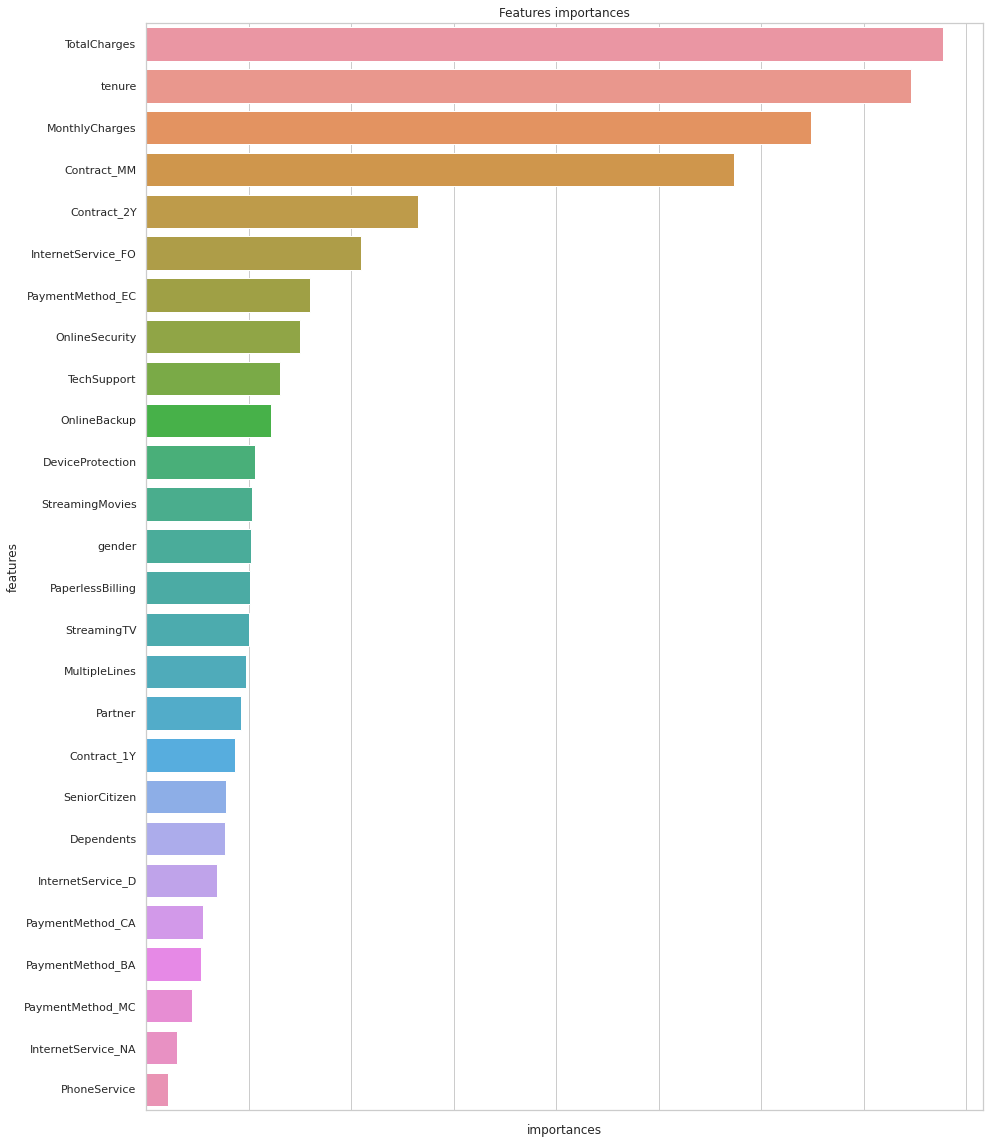

In [ ]:
plt.figure(figsize = (15,20))
plt.title('Features importances')
s = sns.barplot(y='features',x='importances',data=features_importances[:26],orient='h')
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

In [ ]:
X = df_x[features1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.25)

In [ ]:
rf = RandomForestClassifier(random_state=0)

param_dist = {"n_estimators": [1600,1700,1900,2000],
              'max_depth': [None,2],
              "min_samples_leaf": [1,2],
              "min_samples_split": [2,3], #0.5
              "criterion": ["gini"]}

#rf_rs = RandomizedSearchCV(rf_cls, param_distributions=param_dist, cv=5, n_iter =25,verbose=True,random_state=0,scoring='recall', n_jobs=-1).fit(X_train,y_train)
rf_gs2 = GridSearchCV(estimator=rf,param_grid=param_dist,scoring='roc_auc', verbose=True, n_jobs=-1).fit(X_train,y_train)



print('Best params achieve a train score of', abs(rf_gs2.best_score_),'with the params:')
rf_gs2.best_params_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params achieve a train score of 0.9543148755415405 with the params:


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1900}

In [ ]:
rf_cls2 = RandomForestClassifier(random_state=0,
                                max_depth=None,
                                min_samples_leaf=1,
                                min_samples_split=2,
                                n_estimators=1900).fit(X_train,y_train)

rf_cross2 = cross_val_score(rf_cls2, X_train,y_train, cv=5, scoring='roc_auc')


y_pred_rf2 = rf_cls2.predict(X_test)




print("AUC: {}".format(roc_auc_score(y_test, y_pred_rf2)))
print(confusion_matrix(y_test, y_pred_rf2))
print(classification_report(y_test, y_pred_rf2))  
print('Cross validation Scores:\n', (rf_cross2))
print('Cross validation Scores Mean:\n', (rf_cross2.mean()))

AUC: 0.8868614448105339
[[1040  225]
 [  64 1258]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1265
           1       0.85      0.95      0.90      1322

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.89      0.89      0.89      2587

Cross validation Scores:
 [0.96121721 0.9523923  0.95319693 0.94728136 0.95748658]
Cross validation Scores Mean:
 0.9543148755415405


4.2. DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

param_dist = {
              'max_depth': [None,2,4,6],
              "min_samples_leaf": [2,4,6],
              "min_samples_split": [6,7,8,9], #0.5
              "criterion": ["gini"],
              "max_features":[None]}

dt_rs = GridSearchCV(dt,param_dist,scoring='roc_auc', verbose=1,n_jobs=-1).fit(X_train,y_train)

print('Best params achieve a train score of', abs(dt_rs.best_score_),'with the params:')
dt_rs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params achieve a train score of 0.8687148371984257 with the params:


{'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

In [ ]:
dt = DecisionTreeClassifier(random_state=0,
                            max_depth=None,
                            min_samples_leaf=2,
                            min_samples_split=9)

4.3. AdaBoostClassifier

In [ ]:
param_dist = {'n_estimators': range(400,600,25), 
              'learning_rate': [0.01],
              'algorithm':['SAMME.R']}

ada = AdaBoostClassifier(dt,random_state=0)

ada_cv = GridSearchCV(ada, param_dist, cv=5, n_jobs=-1,verbose=1).fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(ada_cv.best_params_))
print("Best score is {}".format(ada_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuned Decision Tree Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 550}
Best score is 0.8842917930709435


4.5. ExtraTreesClassifier

In [ ]:
param_dist = {"n_estimators": [50,100,150,200],
              'max_depth': [None,2,4,6,8],
              "min_samples_leaf": [1,3,5],
              "criterion": ["gini", "entropy"]}


rtex = ExtraTreesClassifier()

rtex_cv = GridSearchCV(rtex, param_dist, cv=5, verbose=1, n_jobs=-1).fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(rtex_cv.best_params_))
print("Best score is {}".format(rtex_cv.best_score_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150}
Best score is 0.8812000882893767


4.6. SGDClassifier

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
sgd = SGDClassifier(random_state=0)

param_grid = {'penalty': ['l2','l1','elasticnet'],
              "loss":['log',],
             'alpha': np.linspace(0.1,0.0001,100)}
            

sgd_cv = GridSearchCV(sgd, param_grid,verbose=1, n_jobs=-1, scoring="roc_auc").fit(X_train,y_train)

print("Tuned Decision SGDClassifier: {}".format(sgd_cv.best_params_))
print("Best score is {}".format(sgd_cv.best_score_))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Tuned Decision SGDClassifier: {'alpha': 0.0021181818181818246, 'loss': 'log', 'penalty': 'elasticnet'}
Best score is 0.8500672582307226


4.7. LogisticRegression

In [ ]:
lg = LogisticRegression(random_state=0)

param_grid = {'solver':['liblinear'],
              'penalty': ['l1'],
             'C': np.linspace(2,1,50)}

lg_cv = GridSearchCV(lg, param_grid,scoring="roc_auc", verbose=1).fit(X_train,y_train)


print("Tuned Decision Logistic Regression: {}".format(lg_cv.best_params_))
print("Best score is {}".format(lg_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Tuned Decision Logistic Regression: {'C': 1.653061224489796, 'penalty': 'l1', 'solver': 'liblinear'}
Best score is 0.8514527628505395


4.8. RidgeClassifier

In [ ]:
rg_cls = RidgeClassifier(random_state=0)
param_grid = {
              'alpha':np.linspace(4,3,21),
              'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']
}

rg_rs = GridSearchCV(rg_cls,param_grid,scoring='roc_auc',n_jobs=-1, verbose=1).fit(X_train,y_train)


print('Best params achieve a test score of', abs(rg_rs.score(X_test, y_test)))
print('Best params achieve a train score of', abs(rg_rs.best_score_),'with the params:')
rg_rs.best_params_

Fitting 5 folds for each of 147 candidates, totalling 735 fits
Best params achieve a test score of 0.8343075230367212
Best params achieve a train score of 0.848428121947524 with the params:


{'alpha': 3.6, 'solver': 'saga'}

4.9. Kneighbor

In [ ]:
param_dist = {'n_neighbors': range(1,10), 'weights': ['uniform','distance'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 'p':[1,2]}

kn = KNeighborsClassifier().fit(X_train,y_train)


kn_cv = GridSearchCV(kn, param_dist,n_jobs=-1, verbose=1).fit(X_train,y_train)


# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(kn_cv.best_params_))
print("Best score is {}".format(kn_cv.best_score_))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Tuned Decision Tree Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best score is 0.8386798746689148


4.10. SVC

In [ ]:
param_grid= {'C':range(250,300,10),
             'kernel': [ 'rbf'],
            # 'degree': range(2,5),
             'gamma':['auto'],
             'probability': [True],}


svc_cv = GridSearchCV(SVC(), param_grid, verbose=1).fit(X_train,y_train)


# Print the tuned parameters and score
print("SVC Parameters: {}".format(svc_cv.best_params_))
print("Best score is {}".format(svc_cv.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
SVC Parameters: {'C': 250, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}
Best score is 0.8237342423377433
